In [1]:
import timeit
import time

In [2]:
start = time.time()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
bc = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

In [6]:
breast = load_breast_cancer(as_frame =True)
df1 = breast.data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
scaler = StandardScaler()
scaler

StandardScaler()

In [8]:
df1_std = scaler.fit_transform(df1)
df1_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
pca =PCA()
pca

PCA()

In [10]:
pca.fit(df1_std)

PCA()

In [11]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

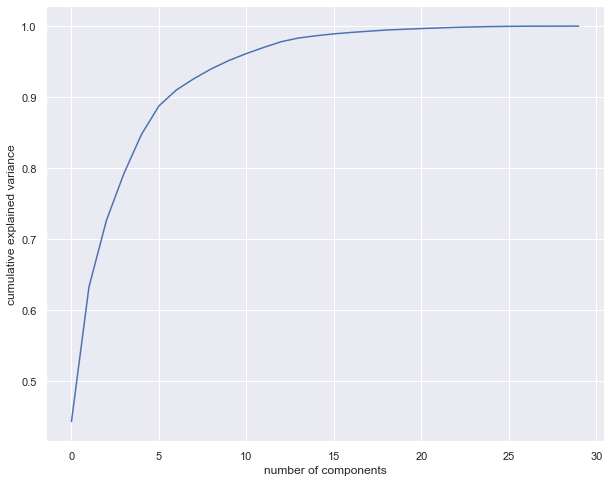

In [12]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
pca =PCA(n_components = 4)

In [14]:
pca.fit(df1)

PCA(n_components=4)

In [15]:
pca.transform(df1)

array([[1160.1425737 , -293.91754364,   48.57839763,   -8.71197531],
       [1269.12244319,   15.63018184,  -35.39453423,   17.86128323],
       [ 995.79388896,   39.15674324,   -1.70975298,    4.1993401 ],
       ...,
       [ 314.50175618,   47.55352518,  -10.44240718,   -9.77188104],
       [1124.85811531,   34.12922497,  -19.74208742,  -23.66088144],
       [-771.52762188,  -88.64310636,   23.88903189,    2.54724855]])

In [16]:
scores_pca = pca.transform(df1)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

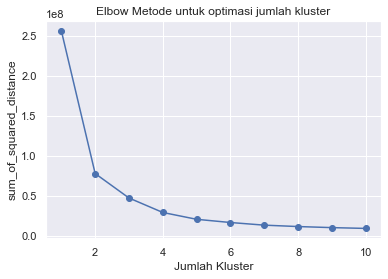

In [17]:
wcss=[]
K = range (1,11)
for k in K:
    km = KMeans (n_clusters = k, init ='random',n_init =10,max_iter =300, tol =1e-04, random_state=2021)
    km =km.fit(scores_pca)
    wcss.append(km.inertia_)
plt.plot(K,wcss, marker ='o')
plt.xlabel("Jumlah Kluster")
plt.ylabel("sum_of_squared_distance")
plt.title("Elbow Metode untuk optimasi jumlah kluster")
plt.show

In [18]:
kmeans_pca = KMeans(n_clusters =2, init ="k-means++", random_state=42)
kmeans_pca

KMeans(n_clusters=2, random_state=42)

In [19]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [20]:
df_pca_kmeans = pd.concat([df1.reset_index(drop=True),pd.DataFrame(scores_pca)],axis =1)

In [21]:
df_pca_kmeans.columns.values[-4:]= ["Component 1","Component 2","Component 3","Component 4"]
df_pca_kmeans["Kmeans PCA"] =kmeans_pca.labels_

In [22]:
df_pca_kmeans.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Component 1,Component 2,Component 3,Component 4,Kmeans PCA
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,1160.142574,-293.917544,48.578398,-8.711975,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,1269.122443,15.630182,-35.394534,17.861283,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,995.793889,39.156743,-1.709753,4.199340,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,-407.180803,-67.380320,8.672848,-11.759867,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,930.341180,189.340742,1.374801,8.499183,1


In [23]:
df_pca_kmeans['Kmeans PCA'].value_counts()

0    438
1    131
Name: Kmeans PCA, dtype: int64

In [24]:
df_pca_kmeans["Segment"] = df_pca_kmeans["Kmeans PCA"].map({0:"Balignant",1:"Beningn"})

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


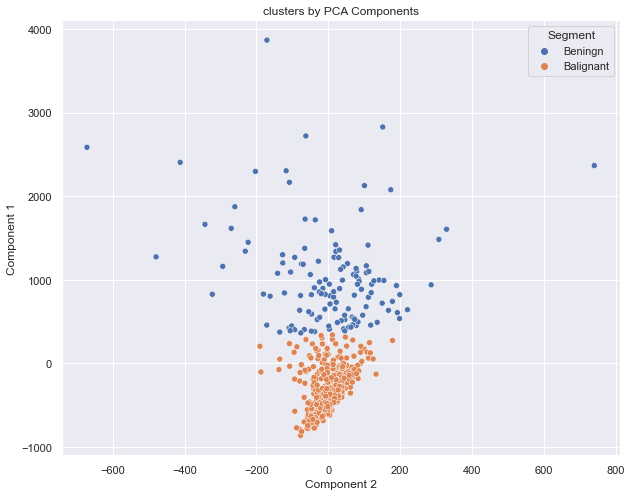

In [25]:
x_axis = df_pca_kmeans["Component 2"]
y_axis = df_pca_kmeans["Component 1"]
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis,hue = df_pca_kmeans["Segment"])
plt.title("clusters by PCA Components")
plt.show()


In [26]:
from sklearn import cluster,metrics
from sklearn.metrics import adjusted_rand_score
metrics.adjusted_rand_score(y,kmeans_pca.labels_)

0.49142453622455523

In [27]:
#def my_function():
    #for x in range(1000):
        
        #pass

In [28]:
#print(timeit.timeit(stmt="my_function()",setup="from_main_import my_function",number=1))

In [29]:
end = time.time()

In [30]:
#print(f"Runtime of the program is {end - start}")

In [31]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 10.98045802116394
